In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Iris.csv')

In [4]:
dataset.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
from sklearn import datasets
iris= datasets.load_iris()

In [6]:
X = iris.data
y= iris.target

In [7]:
#X=dataset.iloc[:, :-1].values
#y=dataset.iloc[:, 4].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.25, random_state=42)

In [9]:
X_train.shape

(112, 4)

In [10]:
X_test.shape

(38, 4)

In [11]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)


X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [15]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# kmeans

In [8]:
X = np.array([[1,3],[11,16],[16,10],[20,10],[35,23],[30,45]])

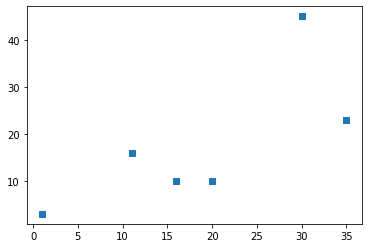

In [10]:
plt.scatter(X[:,0],X[:,1], label='True Position', marker ='s')

In [12]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [13]:
print(kmeans.cluster_centers_)

[[12.    9.75]
 [32.5  34.  ]]


In [14]:
print(kmeans.labels_)

[0 0 0 0 1 1]


# PCA

In [11]:
from sklearn.decomposition import PCA
X = np.array([[4,11],[8,4],[13,5],[7,14]])
X1=np.mean(X[:,0])
X2=np.mean(X[:,1])
pca=PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)


[[ 0.55738997 -0.83025082]]


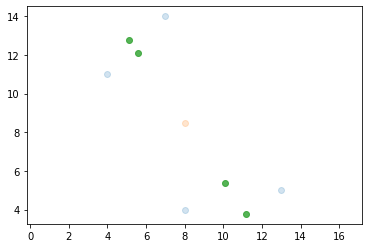

In [12]:
X_new=pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X1, X2, alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal');
print(pca.components_)